In [1]:
import pandas as pd
df = pd.read_csv('Google_Stock_Price.csv',index_col='Date',parse_dates=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,15.689439,15.753504,15.621622,15.684434,15.684434,78169752
2010-01-05,15.695195,15.711712,15.554054,15.615365,15.615365,120067812
2010-01-06,15.662162,15.662162,15.174174,15.221722,15.221722,158988852
2010-01-07,15.250250,15.265265,14.831081,14.867367,14.867367,256315428
2010-01-08,14.814815,15.096346,14.742492,15.065566,15.065566,188783028


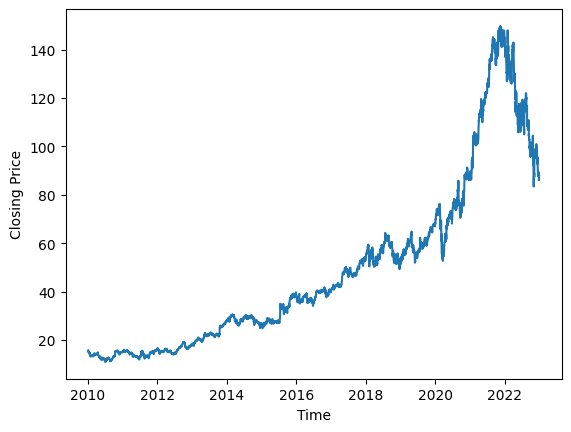

In [2]:
import matplotlib.pyplot as plt
plt.plot(df['Close'])
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.show()

In [3]:
close_prices = df[['Close']].values.reshape(-1,1)
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
close_prices = sc.fit_transform(close_prices)

In [4]:
import numpy as np
def create_sequence(data, sequence_length):
    x,y = [],[]
    for i in range(sequence_length, len(data)):
        x.append(data[i-sequence_length:i,0])
        y.append(data[i,0])
    return np.array(x), np.array(y)

sequence_length = 60
x, y = create_sequence(close_prices,sequence_length)
x = x.reshape(x.shape[0],x.shape[1],1)

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, shuffle=False)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input

model = Sequential ([
    Input(shape=(x.shape[1],1)),
    LSTM(50, return_sequences=True),
    LSTM(50),
    Dense(1)
])
model.compile(
    optimizer='adam',
    loss='mse'
)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    patience=4,
    verbose=1,
    restore_best_weights=True
)
history = model.fit(
    x_train, y_train,
    validation_data = (x_test, y_test),
    epochs=10,
    callbacks=[early_stopping]
)

Epoch 1/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0092 - val_loss: 0.0021
Epoch 2/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.1691e-04 - val_loss: 0.0038
Epoch 3/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.1523e-04 - val_loss: 0.0026
Epoch 4/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.1991e-04 - val_loss: 0.0018
Epoch 5/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 1.1465e-04 - val_loss: 0.0023
Epoch 6/10
18/81 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.2533e-04

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score as r2, mean_squared_error as mse, mean_absolute_error as mae
print("R2 Score: ", r2(y_test, y_pred))
print("MSE: ", mse(y_test,y_pred))
print("MAE: ", mae(y_test,y_pred))

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y_test, color='Blue', label='Actual')
plt.plot(y_pred, color='Red', label='Predicted')
plt.legend()
plt.show()